In [61]:
import pandas as pd
import tables
import numpy as np

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['table', 'record']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
%pylab inline

In [62]:
groundtruth = pd.read_csv("data/davis/poster_translation/groundtruth.txt",
                         sep=" ",
                         header=None,
                         names=["time", "px", "py", "pz", "qx", "qy", "qz", "qw"])

In [63]:
events = pd.read_csv("data/davis/poster_translation/events.txt",
                    sep=" ",
                    header=None,
                    dtype={"time": np.float64,
                           "x": np.uint8,
                           "y": np.uint8,
                           "polarity": np.bool},
                    names=["time", "x", "y", "polarity"])

In [64]:
with pd.HDFStore("data/davis/poster_translation_pandas.h5") as store:
    store.append("ground_truth", groundtruth, format="table",
                data_columns=True)
    store.append("events", events, format="table",
                data_columns=True)

In [69]:
with pd.HDFStore("data/davis/poster_translation_pandas.h5") as store:
    df = store.select("events", "index > 10000000 & index < 10002000")

In [70]:
df

,time,x,y,polarity
10000001,11.358060,176,111,True
10000002,11.358061,198,136,True
10000003,11.358061,32,98,False
10000004,11.358061,159,98,True
10000005,11.358061,141,98,True
10000006,11.358062,229,163,True
10000007,11.358064,23,78,True
10000008,11.358069,110,116,True
10000009,11.358069,44,122,False
10000010,11.358070,10,140,False


In [7]:
class MotionCapture(tables.IsDescription):
    time = tables.Float64Col()
    px = tables.Float64Col()
    py = tables.Float64Col()
    pz = tables.Float64Col()
    qx = tables.Float64Col()
    qy = tables.Float64Col()
    qz = tables.Float64Col()
    qw = tables.Float64Col()


In [18]:
h5file = tables.open_file("data/davis/poster_translation.h5",
                         mode="w",
                         title="poster_translation")

In [20]:
table = h5file.create_table("/", "groundtruth", 
                            MotionCapture,
                            "Ground truth data from motion capture")

In [28]:
row = table.row
for record in groundtruth.to_records(index=False):
    for (i, col) in enumerate(groundtruth.columns):
        row[col] = record[i]
    row.append()
table.flush()

In [32]:
indexrows = table.cols.time.create_csindex()

In [33]:
table.flush()

In [17]:
h5file.close()

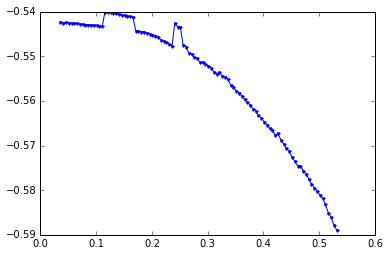

In [39]:
plot(groundtruth["time"][:100], groundtruth["py"][:100], "b.-")

In [40]:
class Event(tables.IsDescription):
    time = tables.Float64Col()
    x = tables.UInt8Col()
    y = tables.UInt8Col()
    polarity = tables.BoolCol()    

In [43]:
len(events)

100033286

In [44]:
table = h5file.create_table("/", "events", 
                            Event,
                            "Event camera output",
                            expectedrows=len(events))

In [45]:
row = table.row
for record in events.to_records(index=False):
    for (i, col) in enumerate(events.columns):
        row[col] = record[i]
    row.append()
table.flush()

In [46]:
table.cols.time.create_csindex()

100033286

In [47]:
table.flush()